In [1]:
from EDA.visualization import *

# 1. 상관관계 분석


## 1-1. 상관관계 확인 

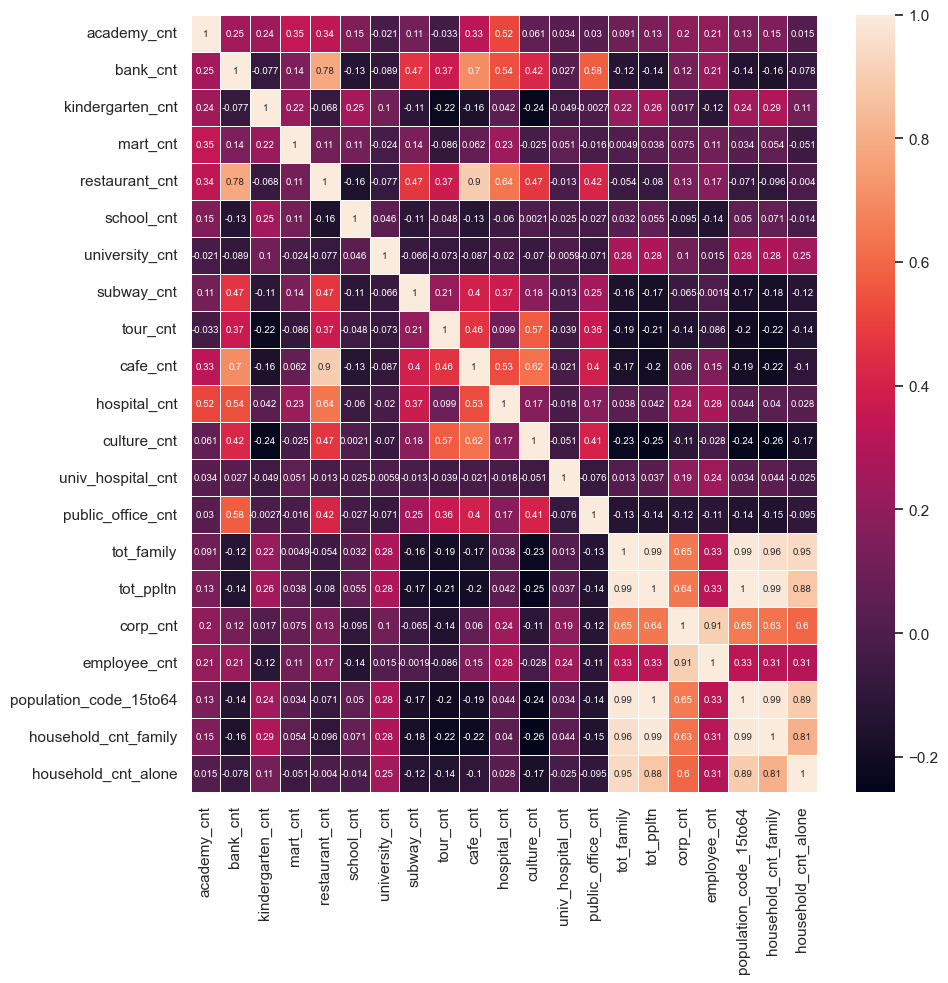

In [2]:
df_check1, df_check2 =get_heatmap_data()
get_heatmap(df_check1)

- 상관관계가 높지만 중요한 의미를 띄는 feature → feature 조합으로 새로운 feature 생성
  - alone_ratio
  - corp_emp_ratio
<br></br> 
- 기존의 feature & 조합된 feature와 중복된 의미를 지닌 feature → 제거
  - tot_ppltn (총 인구 수)
  - household_cnt_family (친족가구 수)
  

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-n755{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:16px;
  text-align:center;vertical-align:top}
.tg .tg-5a60{background-color:#d4dae4;border-color:#4d4747;color:#000000;font-family:Tahoma, Geneva, sans-serif !important;
  font-size:16px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-m9y0{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:16px;
  text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-5a60">Feature name</th>
    <th class="tg-5a60">정의</th>
    <th class="tg-5a60">상관계수</th>
    <th class="tg-5a60">Feature 조합</th>
    <th class="tg-5a60">최종 Feature의 정의</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-m9y0">household_cnt_alone</td>
    <td class="tg-m9y0">1인가구 수</td>
    <td class="tg-m9y0" rowspan="2"><br>0.96</td>
    <td class="tg-m9y0" rowspan="2"><br>1인 가구 수 / 총 가구 수</td>
    <td class="tg-m9y0" rowspan="2">alone_ratio<br><br>(1인 가구 수 비율)</td>
  </tr>
  <tr>
    <td class="tg-n755">tot_family</td>
    <td class="tg-n755">총 가구 수</td>
  </tr>
  <tr>
    <td class="tg-m9y0">corp_cnt</td>
    <td class="tg-m9y0">사업체 수</td>
    <td class="tg-m9y0" rowspan="2"><br>0.91</td>
    <td class="tg-m9y0" rowspan="2"><br>사업체 수 / 종사자 수</td>
    <td class="tg-m9y0" rowspan="2">corp_emp_ratio<br><br>(종사자 수 대비 사업체 수)</td>
  </tr>
  <tr>
    <td class="tg-n755">employee_cnt</td>
    <td class="tg-n755">종사자 수</td>
  </tr>
</tbody>
</table>

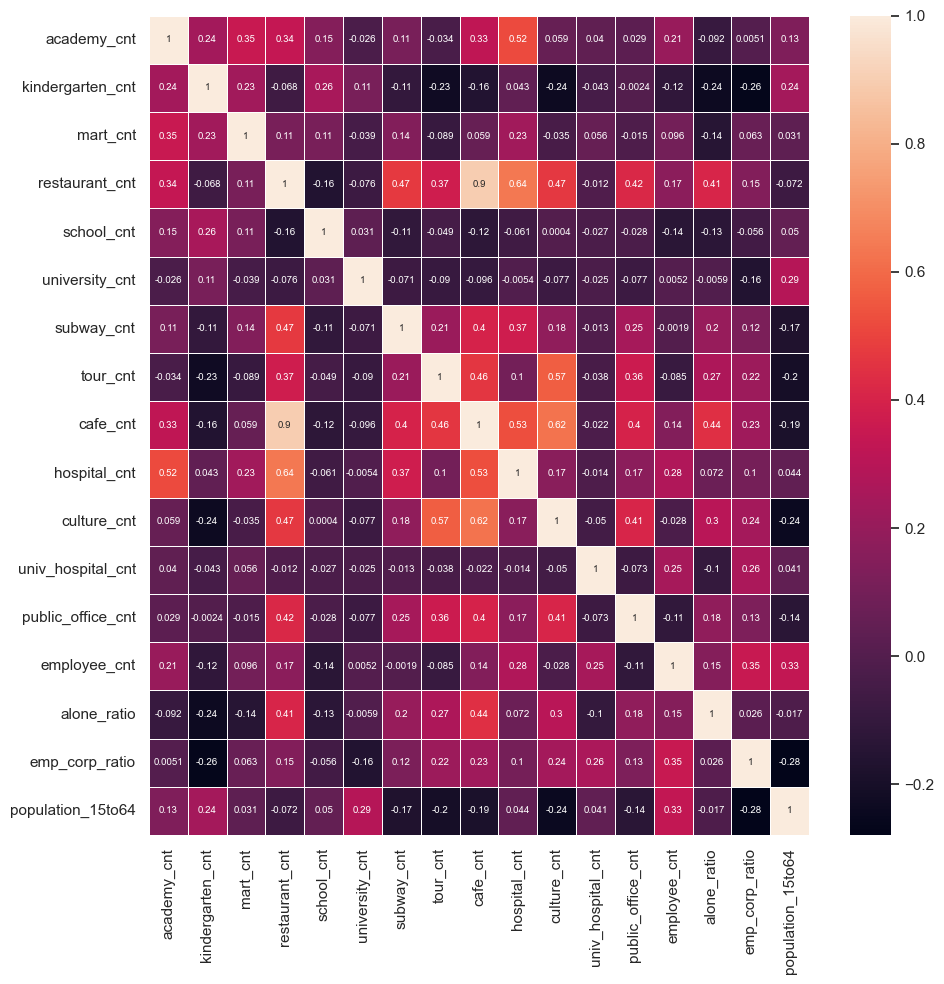

In [4]:
get_heatmap(df_check2)

- feature 가공을 통해 대부분의 feature들의 상관관계를 0.7 미만으로 조정

# 2. 다람쥐 버스 vs 일반 버스 특징 비교

- 아래 두가지 타입의 정류장들의 평균적인 인프라, 인구 특징을 비교
  - 다람쥐 버스: 다람쥐 버스의 정류장(95개) 중 승/하차가 각각 많은 정류장 top 30개의 평균적인 인프라, 인구 수
  - 전체 버스: 일반 버스 정류장 (약 12,000개)의 평균적인 인프라, 인구 수

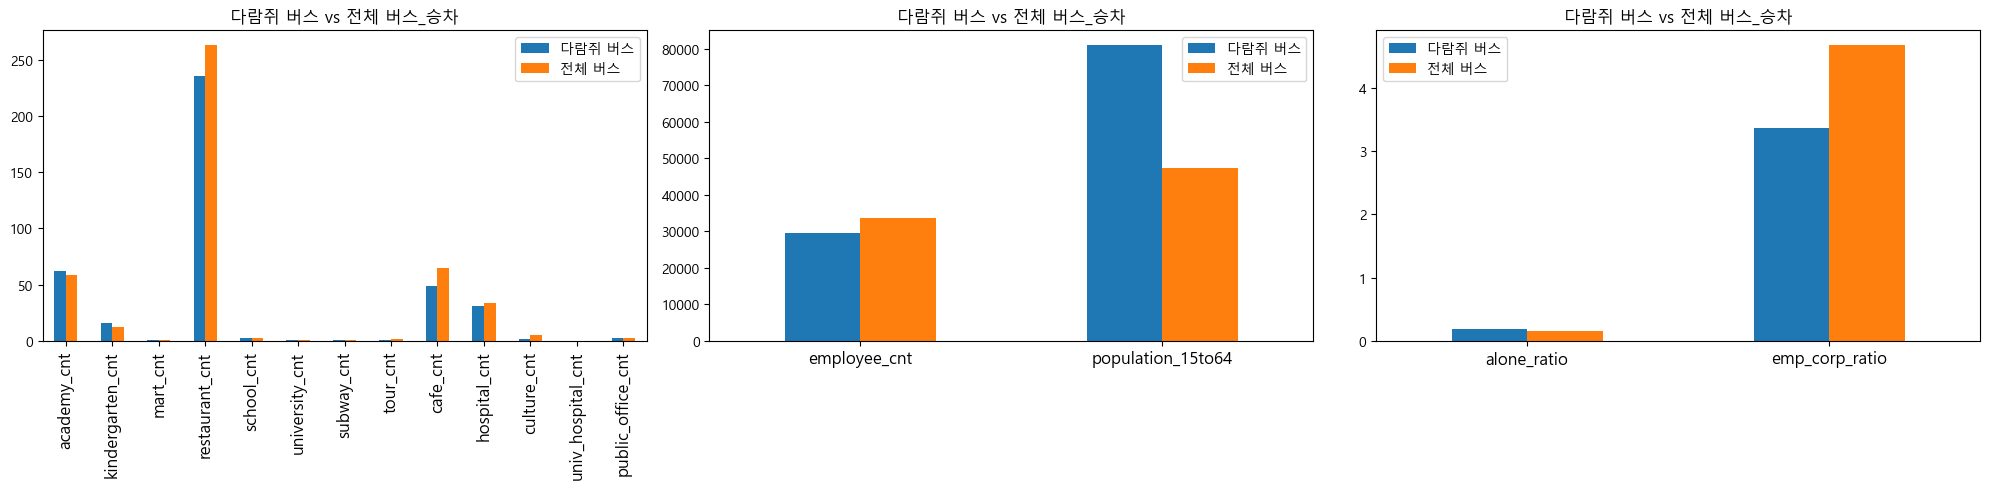

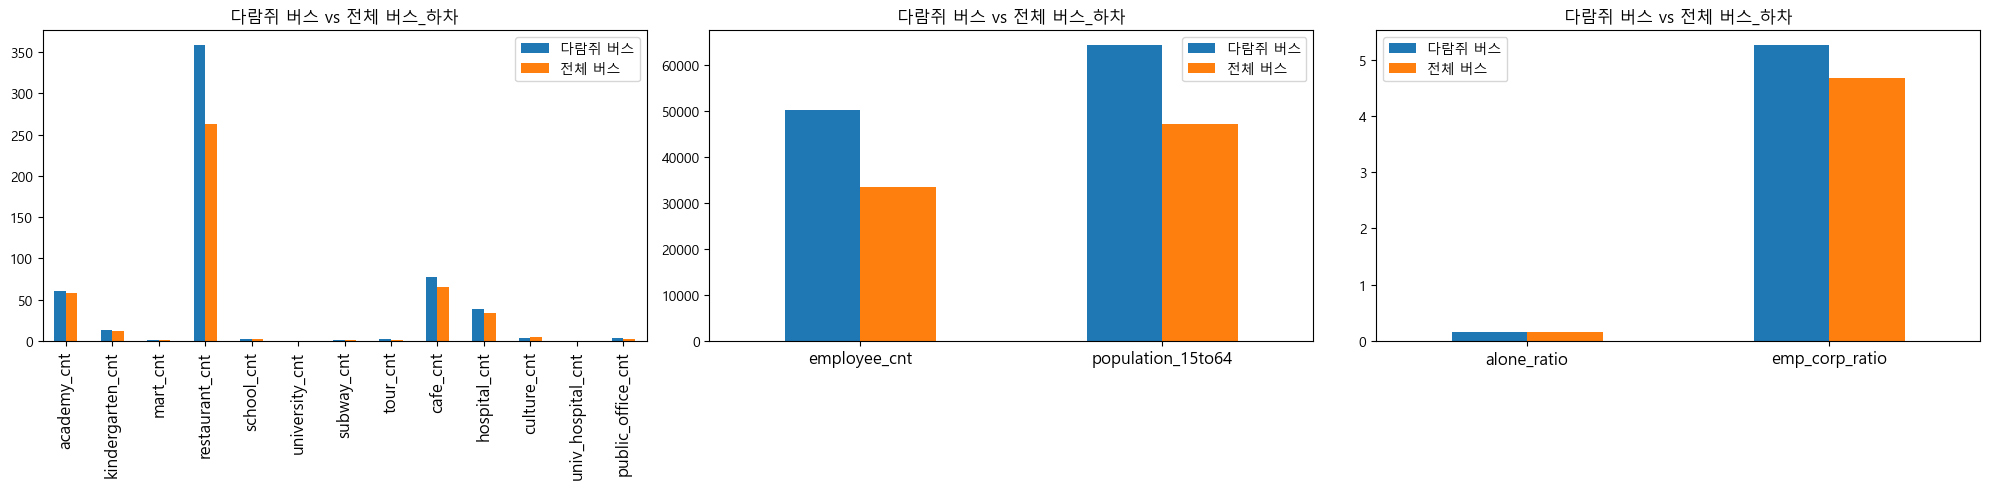

In [2]:
get_barplot_daram_vs_all()

### < 결론>
1. 다람쥐 버스의 승차가 많은 지역의 특징
   - 인프라 특징: 학원, 유치원↑
   - 인구 특징: 15-64 경제인구 수 ↑
   - 종합: 거주지의 특징을 보임

2. 다람쥐 버스의 하차가 많은 지역의 특징
   - 인프라 특징: 학원, 유치원, 병원, 식당, 카페↑
   - 인구 특징: 15-64 경제인구 수, 사업체 별 종사자 수, 종사자 수
   - 종합: 다양한 특징이 혼재

3. 결론
   - 승차, 하차가 많은 지역의 두드러진 특징을 추출할 수 없었다.
   - 특징이 두드러지게 드러날 수 있도록 하는 분석이 필요.
   - 추후 분석 방향: 다람쥐 버스의 기점, 종점만의 특징을 분석

# 3. 다람쥐 버스의 기점, 종점 분석

In [7]:
tb_subway_month_addr = pd.read_csv(os.path.join(csv_path,'tb_subway_month_addr.csv'))
df_filtered = df_preprocess(tb_subway_month_addr)
df_filtered

,호선명,지하철역,시,구,동,ride_sum,alight_sum
0,1호선,동대문,서울,종로구,창신동,55858.791667,59525.166667
1,1호선,동묘앞,서울,종로구,숭인동,25757.416667,49101.875000
2,1호선,서울역,서울,중구,남대문로5가,149980.375000,425920.583333
3,1호선,시청,서울,중구,정동,25549.000000,315345.833333
4,1호선,신설동,서울,동대문구,신설동,65680.500000,119073.875000
...,...,...,...,...,...,...,...
367,우이신설선,솔밭공원,서울,강북구,우이동,28616.500000,7341.000000
368,우이신설선,솔샘,서울,강북구,미아동,77016.416667,11582.750000
369,우이신설선,신설동,서울,동대문구,신설동,5976.291667,26024.500000
370,우이신설선,정릉,서울,성북구,정릉동,46462.666667,15143.458333


## 3-1. `다람쥐 버스의 기점, 종점 - 승/하차 수 Top 30인 지하철 역` 과의 연관성

- ### 승차

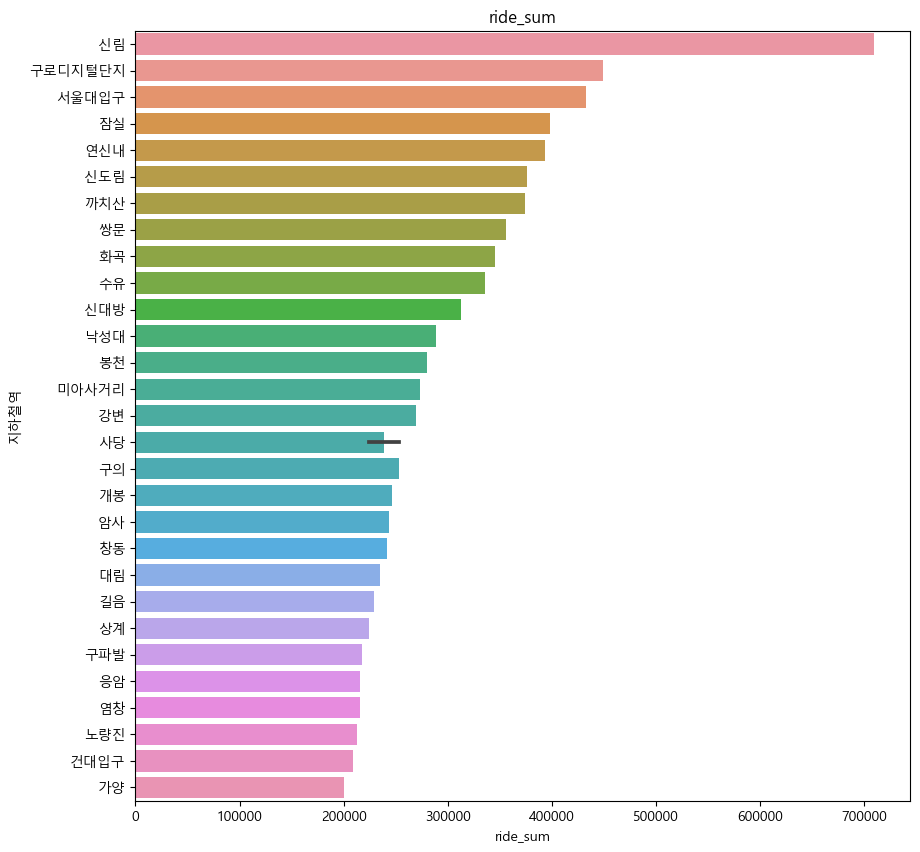

In [8]:
get_subway_barplot(df_filtered, 'ride_sum','지하철역', 'ride_sum')

<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-trmu{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
.tg .tg-hfcq{background-color:#d4dae4;border-color:#4d4747;color:#000000;font-family:Tahoma, Geneva, sans-serif !important;
  font-size:14px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-hhed{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
</style>

<table class="tg">
<thead>
  <tr>
    <th class="tg-hfcq">노선명</th>
    <th class="tg-hfcq">기점, 종점</th>
    <th class="tg-hfcq">인근 역</th>
    <th class="tg-hfcq">다람쥐버스 정류장</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-trmu">8552</td>
    <td class="tg-trmu">종점</td>
    <td class="tg-trmu">신림</td>
    <td class="tg-trmu">신림사거리.신림역</td>
  </tr>
  <tr>
    <td class="tg-hhed">8331</td>
    <td class="tg-hhed">종점</td>
    <td class="tg-hhed">잠실</td>
    <td class="tg-hhed">잠실역 8번출구</td>
  </tr>
  <tr>
    <td class="tg-trmu">8551</td>
    <td class="tg-trmu">기점</td>
    <td class="tg-trmu">봉천</td>
    <td class="tg-trmu">봉천역</td>
  </tr>
  <tr>
    <td class="tg-hhed">8551</td>
    <td class="tg-hhed">종점</td>
    <td class="tg-hhed">노량진</td>
    <td class="tg-hhed">노량진역 3번출구</td>
  </tr>
</tbody>
</table>

<br>
- 다람쥐 버스의 기점, 종점 14개 중 4개만 승차 수 Top 30인 지하철역과 연관있음.


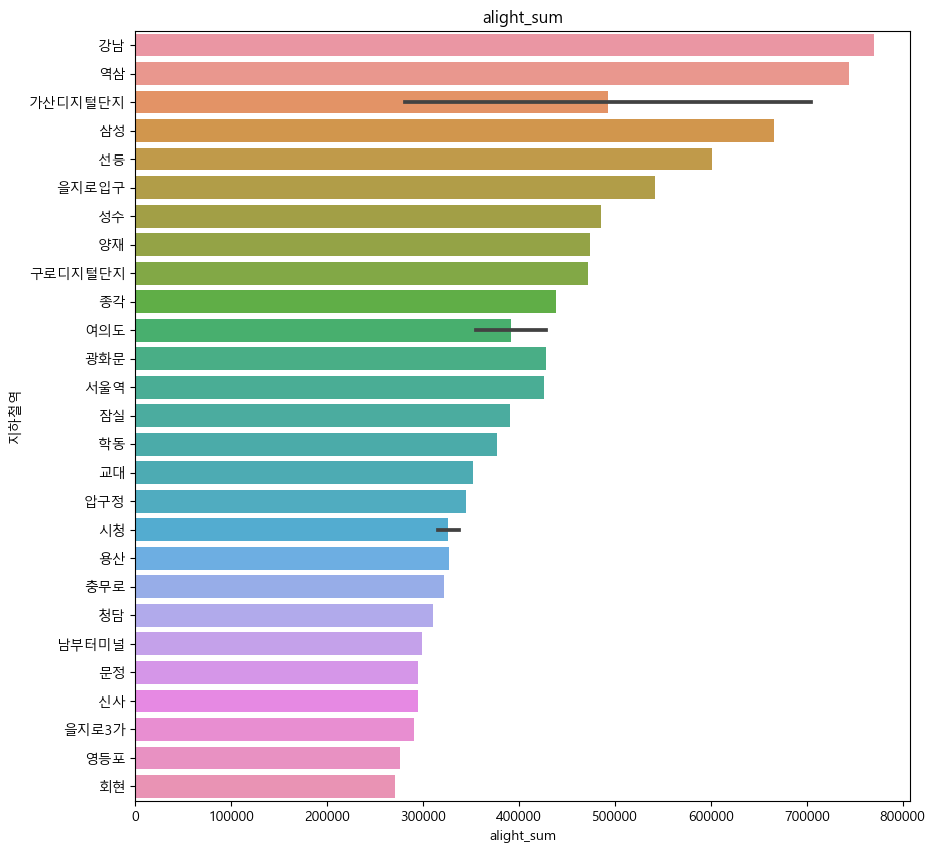

In [9]:
get_subway_barplot(df_filtered, 'alight_sum','지하철역', 'alight_sum')


<style type="text/css">
.tg  {border-collapse:collapse;border-color:#ccc;border-spacing:0;}
.tg td{background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;
  font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-trmu{background-color:#ffffff;border-color:#4d4747;font-family:Tahoma, Geneva, sans-serif !important;font-size:14px;
  text-align:center;vertical-align:top}
.tg .tg-hfcq{background-color:#d4dae4;border-color:#4d4747;color:#000000;font-family:Tahoma, Geneva, sans-serif !important;
  font-size:14px;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-hfcq">노선명</th>
    <th class="tg-hfcq">기점, 종점</th>
    <th class="tg-hfcq">인근 역</th>
    <th class="tg-hfcq">다람쥐버스 정류장</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-trmu">8331</td>
    <td class="tg-trmu">종점</td>
    <td class="tg-trmu">잠실</td>
    <td class="tg-trmu">잠실역 8번출구</td>
  </tr>
</tbody>
</table>

- 다람쥐 버스의 기점, 종점 14개 중 1개만 하차 수 Top 30인 지하철역과 연관있음.


### <결론>
- 유동인구...절대적 지표x..?

## 3-2. 다람쥐 버스 기, 종점의 인프라, 인구 특징 분석

In [7]:
df_scaled = get_scaled_daram_df()
df_scaled

,academy,kindergarten,mart,restaurant,school,university,tour,cafe,hospital,culture,univ_hospital,public_office,employee,alone_ratio,emp_corp_ratio,population_15to64,순번
노선명,,,,,,,,,,,,,,,,,
8221,0.347299,0.840339,0.917663,-0.407219,0.716039,-0.408248,-0.350524,-0.617244,-0.500980,-0.515526,-0.277350,1.233905,-0.101108,-0.484274,-0.488372,-0.168578,1
8771,0.035049,0.667328,-1.491202,-0.811524,2.994345,-0.408248,-0.759468,-0.717726,-1.069660,-0.515526,-0.277350,-0.094916,-0.813769,-0.934276,-0.388210,-0.587189,1
8761,1.930857,-0.716760,0.917663,1.554957,0.260378,-0.408248,0.467365,2.354140,1.811652,2.825848,-0.277350,-0.759326,-0.395121,1.827957,-0.209812,-0.783398,1
8552,-1.080133,-0.370738,-1.491202,-1.226956,0.716039,2.449490,-0.350524,-1.119652,-1.372956,-0.515526,-0.277350,-0.759326,0.493491,1.369815,-0.530422,1.942863,1
8551,0.837979,1.705394,0.114708,0.609106,0.260378,-0.408248,-0.350524,0.172254,0.408908,-0.381871,-0.277350,1.233905,0.503730,1.026083,-0.406031,1.744632,1
8441,-0.723275,-0.024716,1.720618,-1.145353,-0.650945,-0.408248,-0.759468,-0.933043,-0.804276,-0.515526,-0.277350,-1.423737,-0.878515,-0.630016,-0.265739,-0.787458,1
8331,-0.544846,2.051416,0.114708,-0.333035,-0.195283,-0.408248,-0.350524,-0.588535,0.181436,-0.515526,-0.277350,1.233905,-0.789504,-0.504796,-0.722179,-0.528611,1
8441,-1.124740,-0.543749,0.114708,-0.596389,0.260378,-0.408248,-0.350524,-0.516762,-0.311420,-0.515526,-0.277350,-0.094916,-0.302895,-0.252590,0.857679,-0.585609,10
8771,-0.388720,0.667328,-0.688247,-0.996984,-0.650945,-0.408248,-0.759468,-0.846916,-0.273508,-0.515526,-0.277350,-0.759326,-0.540782,-0.382704,-0.625529,-0.089653,11


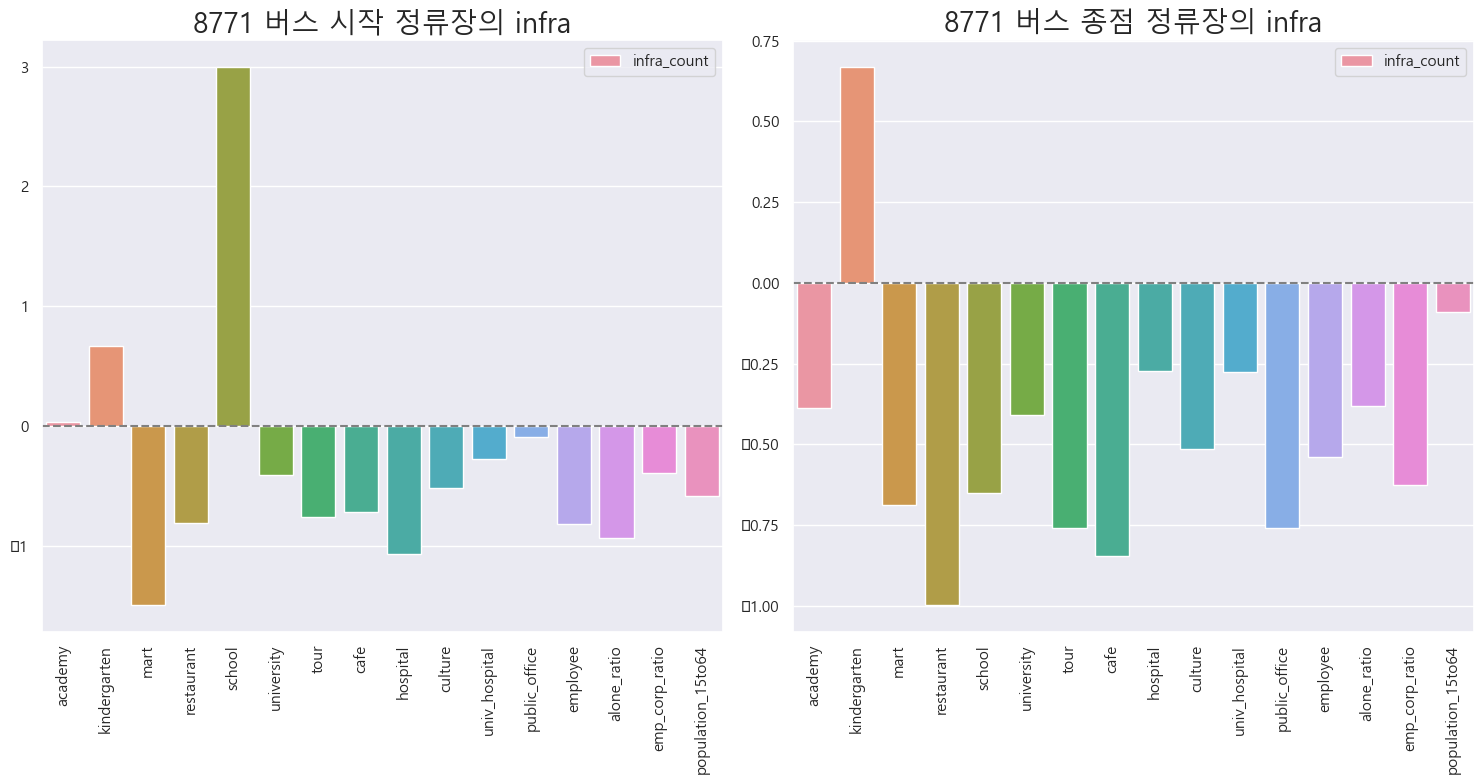

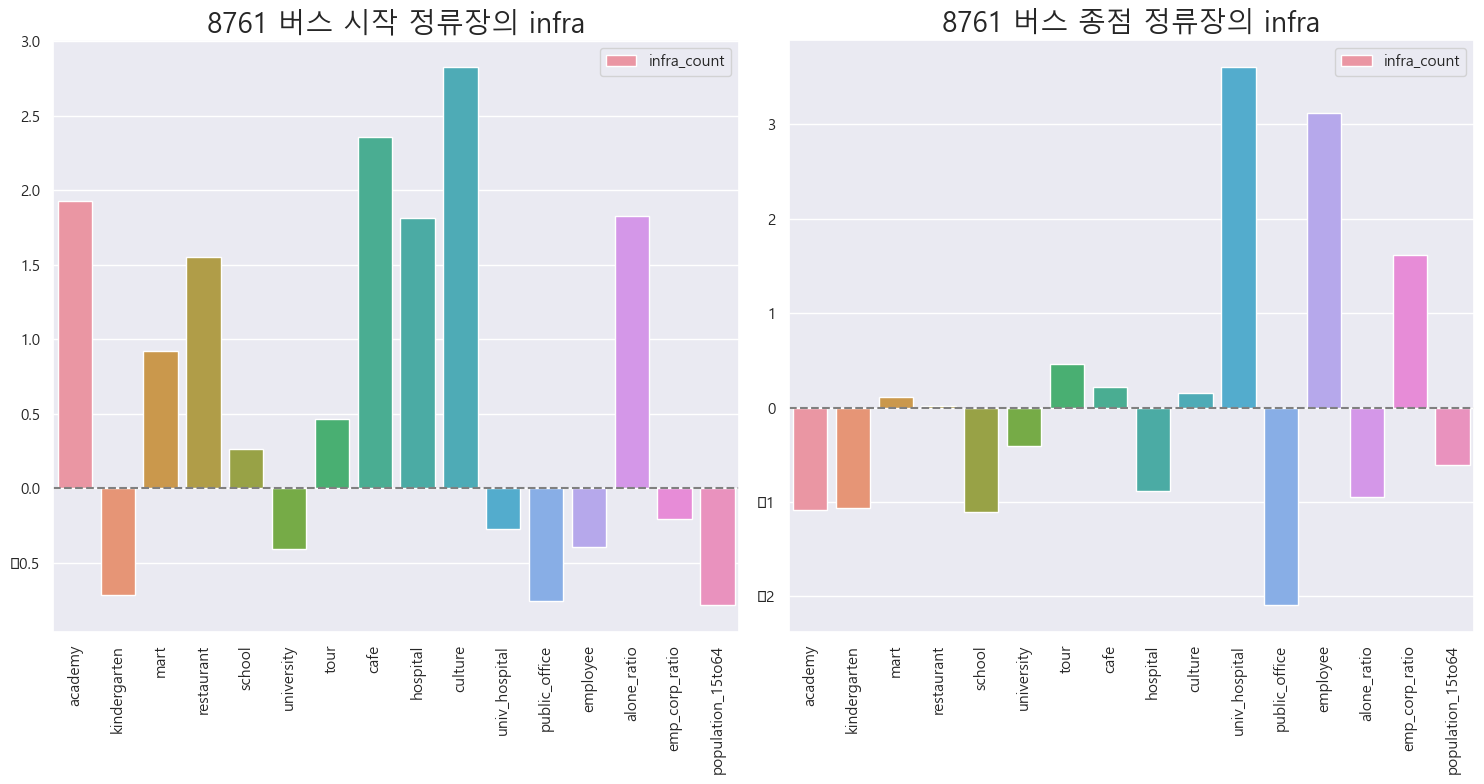

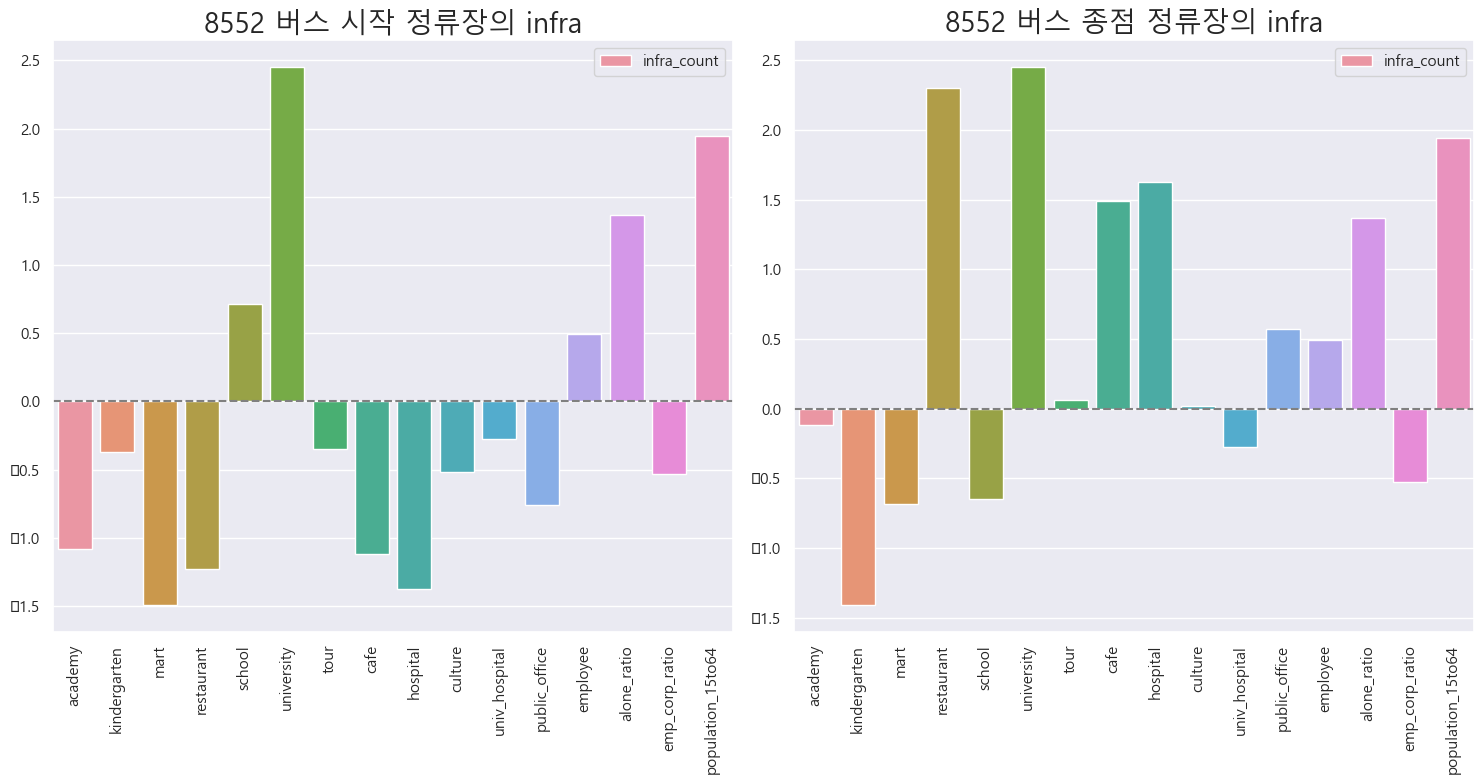

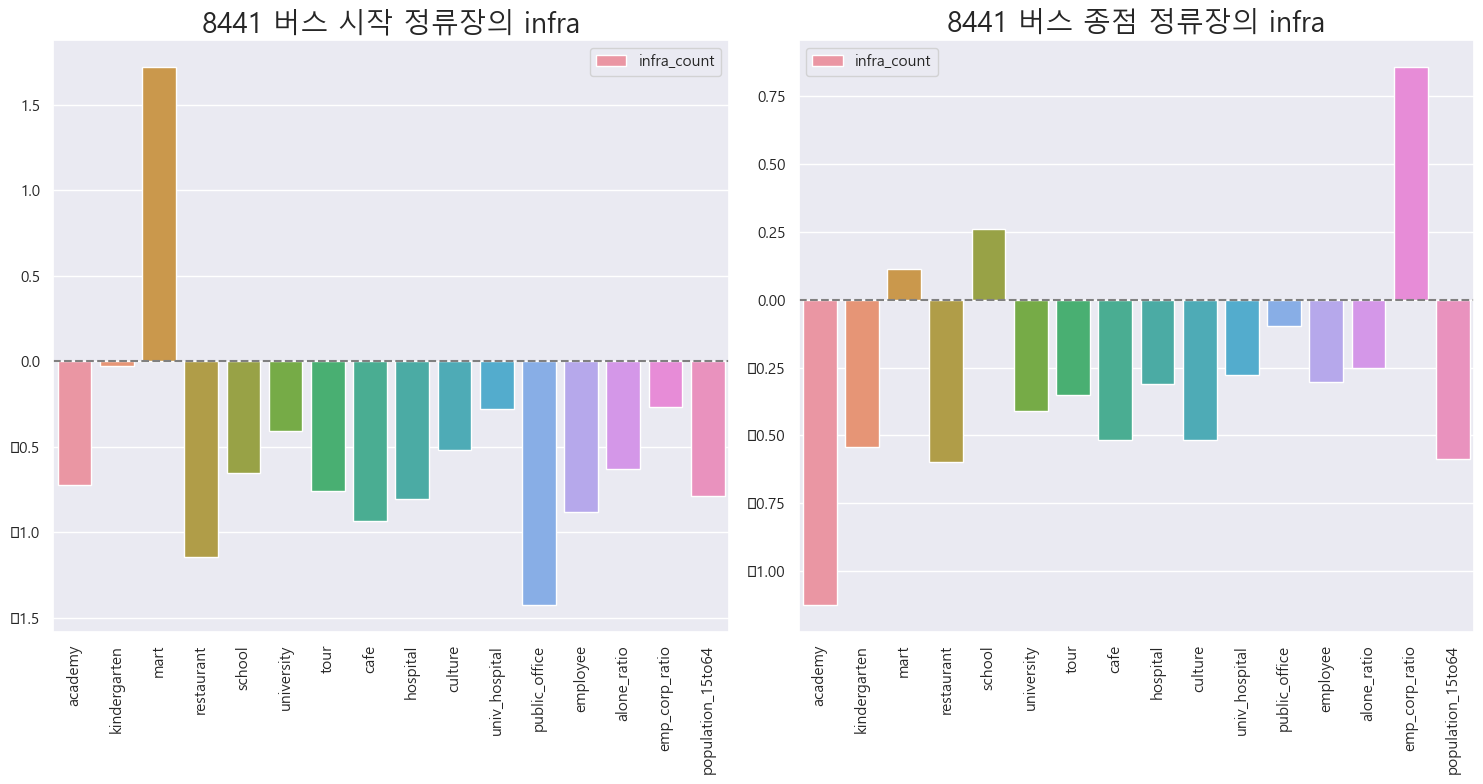

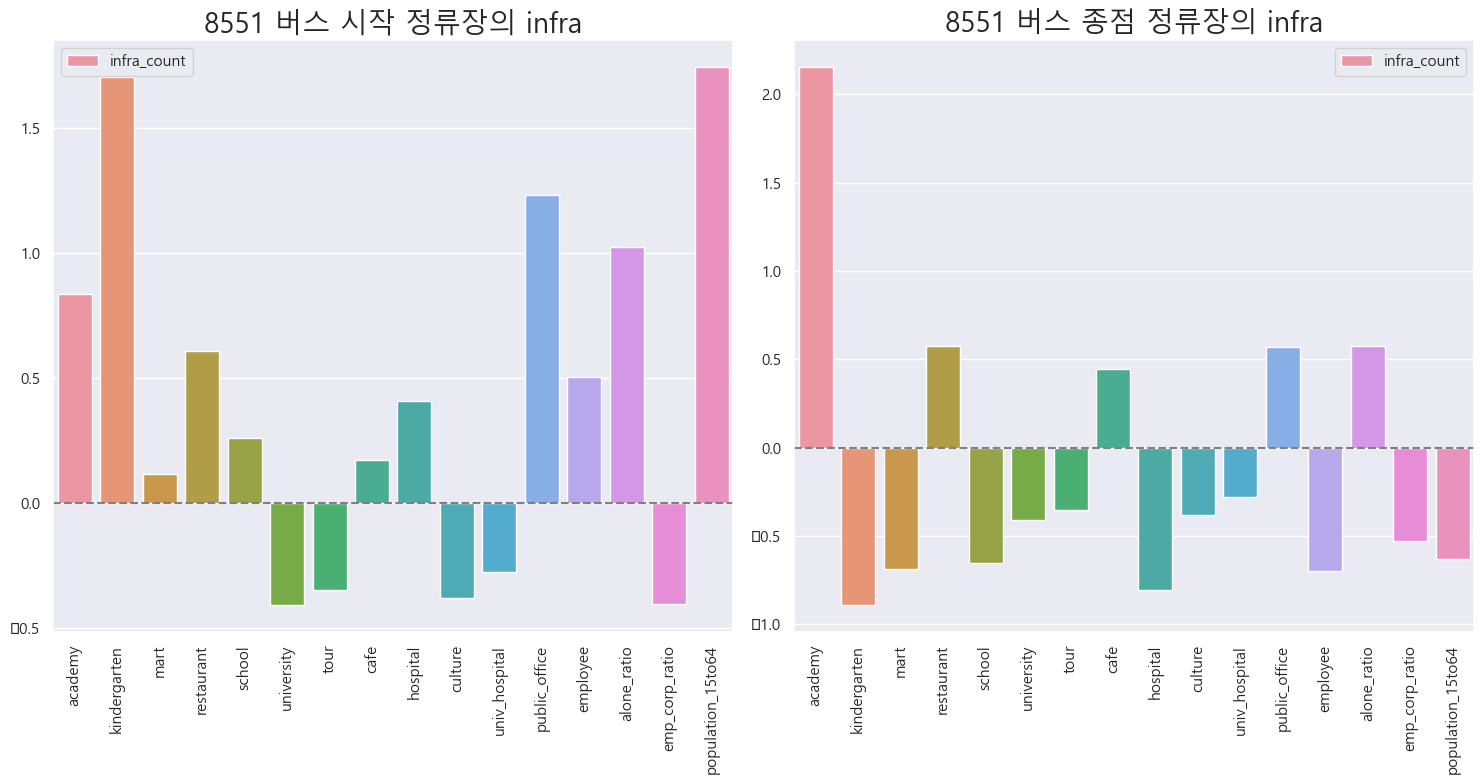

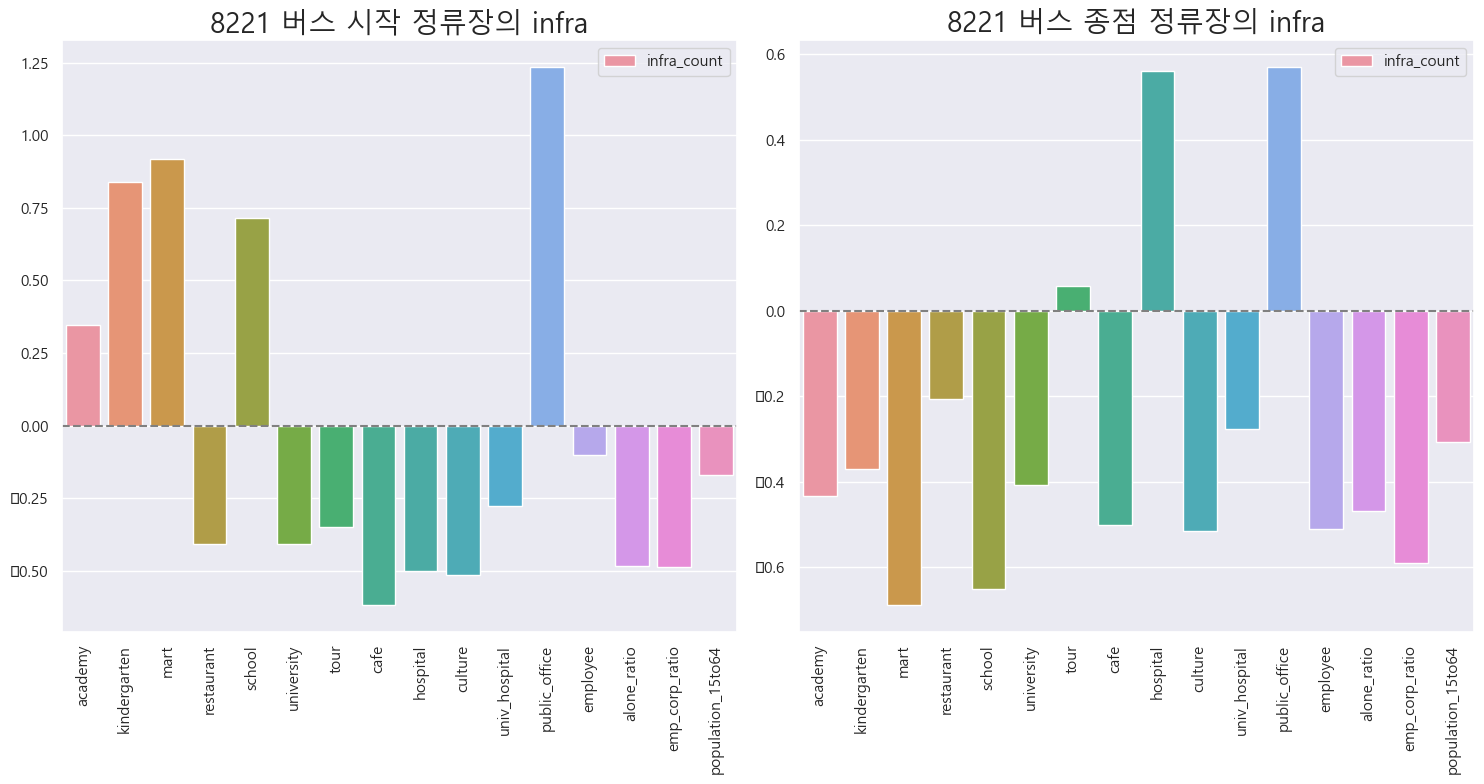

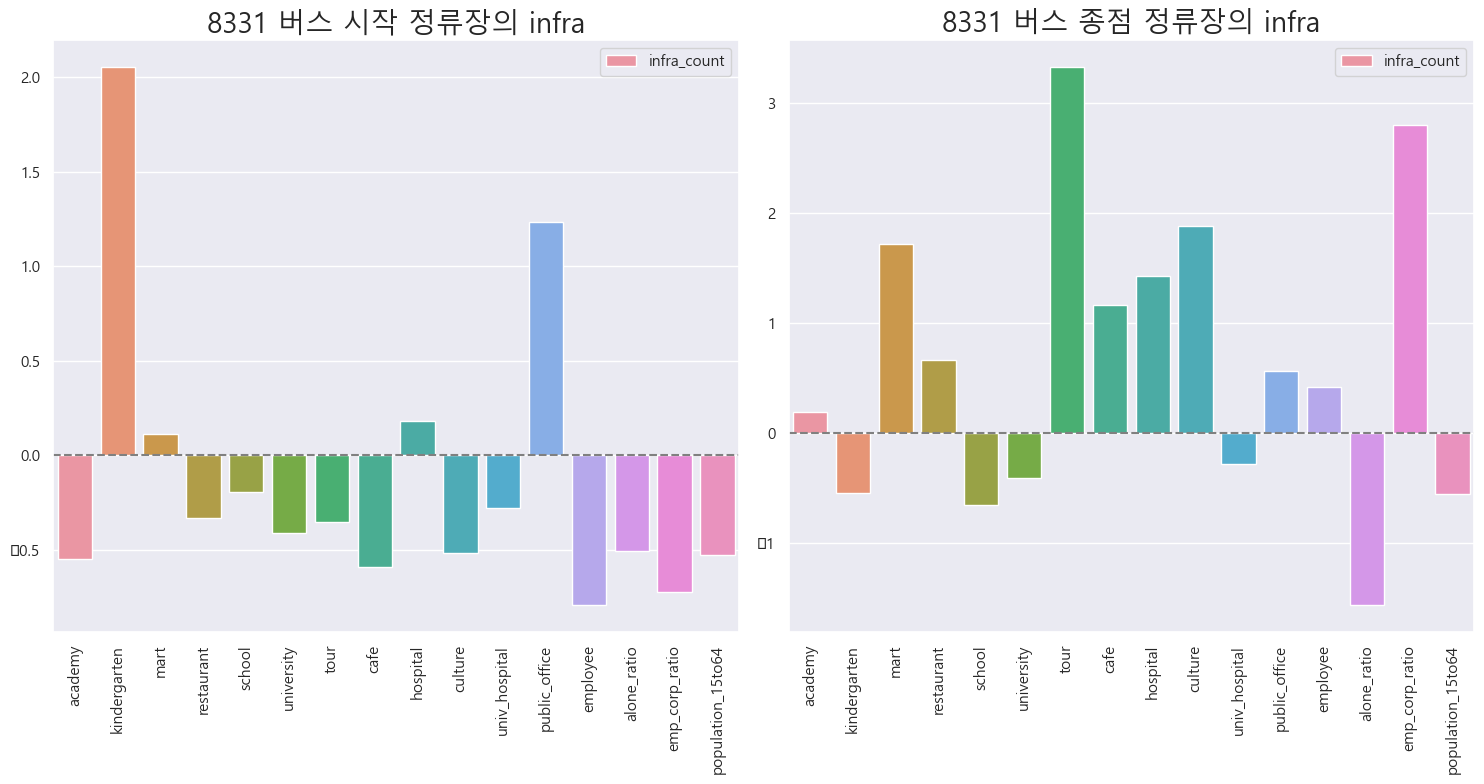

In [8]:
get_barplot_start_end(df_scaled)

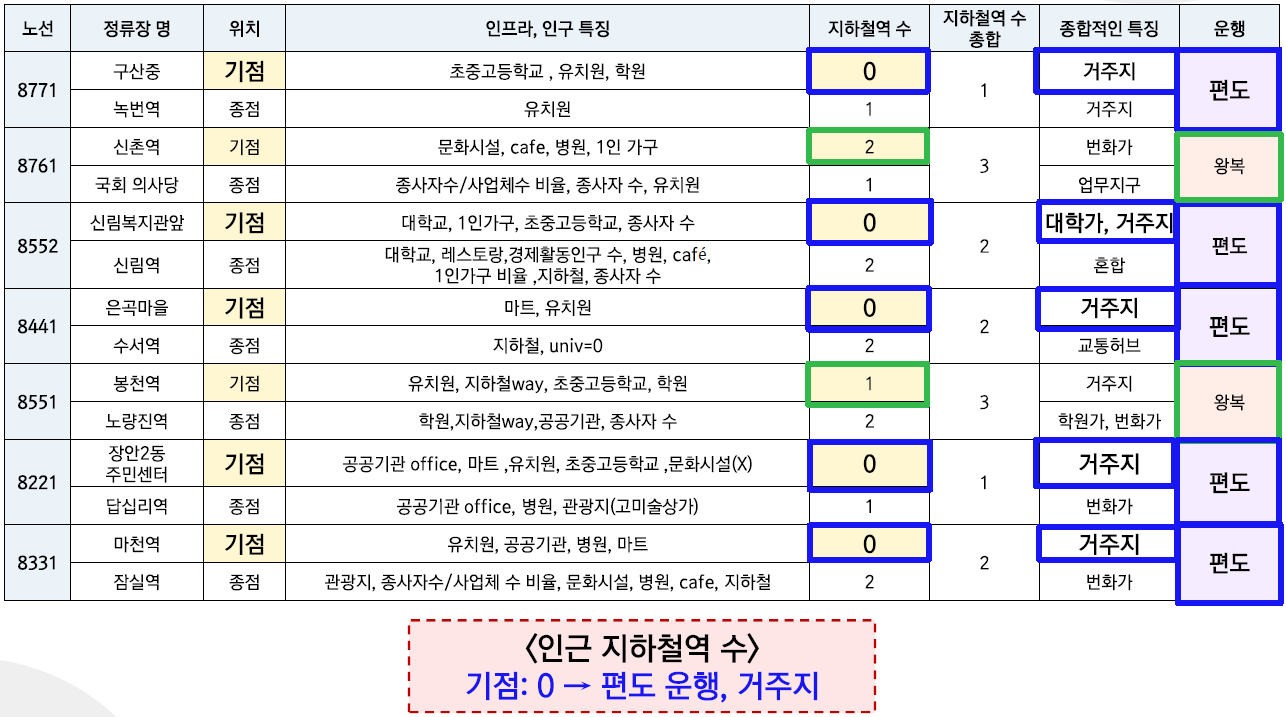
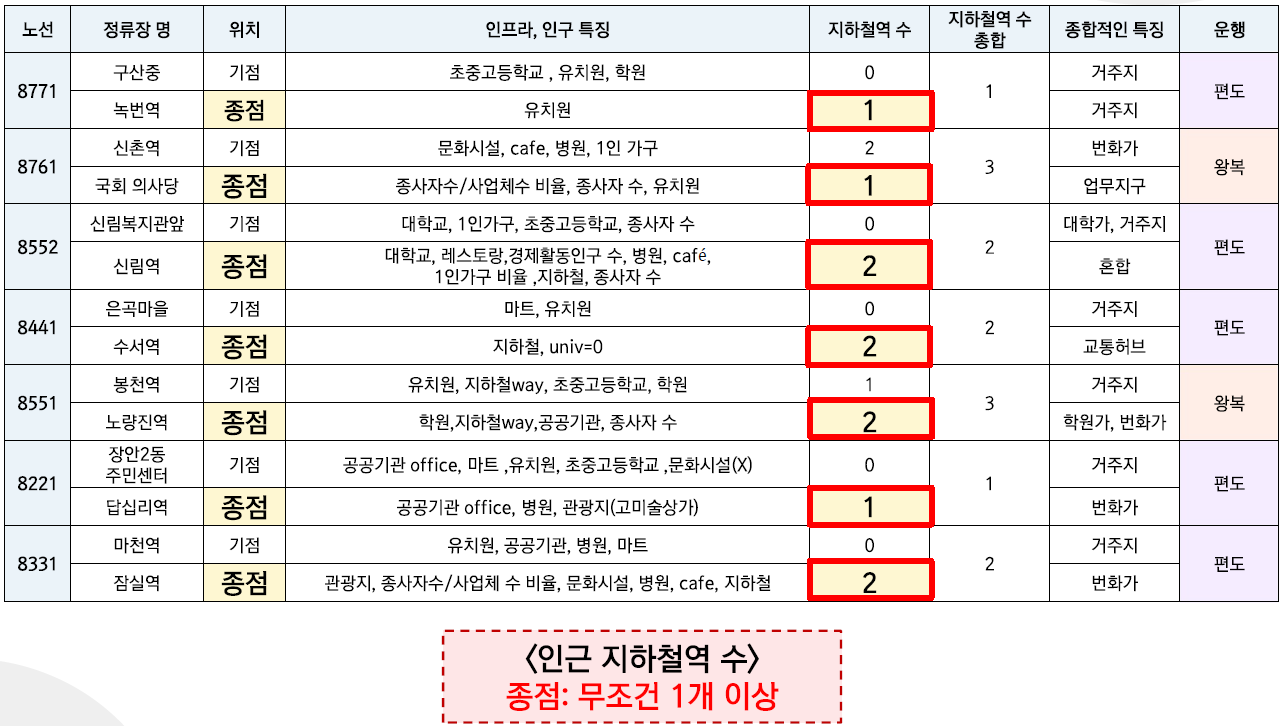

# 4. EDA 결론
- 다람쥐 버스 정류장은 유동인구에 절대적으로 의존하지 않음.
- 정류장마다 인프라 특성이 다름.